## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
data = pd.read_csv('E://UsedCarsPrice.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

## Replace or Remove Null

In [5]:
data['EngineV'] = data['EngineV'].fillna(data['EngineV'].mean())

In [6]:
data.dropna(axis= 0, inplace= True)

In [7]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Dealing with Data

### Remove or Replace outliers

<AxesSubplot:xlabel='Price', ylabel='Density'>

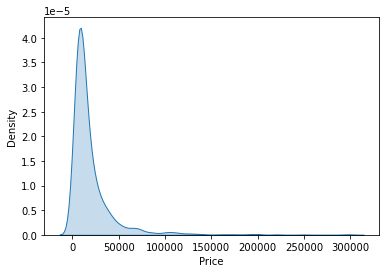

In [8]:
sns.kdeplot(data['Price'], shade= True)

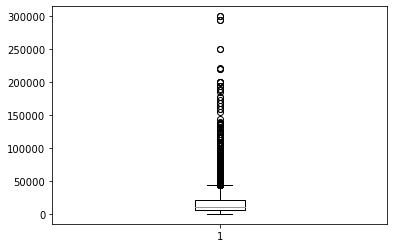

In [9]:
plt.boxplot(data['Price'])
plt.show()

In [10]:
price_data = data['Price'].values
price_data = price_data.reshape(len(price_data))
data = data[data['Price'].between(np.percentile(price_data,5), np.percentile(price_data,95), inclusive=True )]

C:\Users\merci\AppData\Local\Temp/ipykernel_9124/3020092923.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  data = data[data['Price'].between(np.percentile(price_data,5), np.percentile(price_data,95), inclusive=True )]


<AxesSubplot:xlabel='Price', ylabel='Density'>

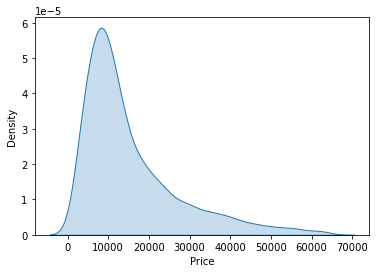

In [11]:
sns.kdeplot(data['Price'], shade= True)

## Finding correlation between features

In [12]:
numerical_variables = data.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis= 1)
numerical_variables

,Price,Mileage,EngineV,Year
0,4200.0,277,2.000000,1991
1,7900.0,427,2.900000,1999
2,13300.0,358,5.000000,2003
3,23000.0,240,4.200000,2007
4,18300.0,120,2.000000,2011
...,...,...,...,...
4339,17900.0,35,1.600000,2014
4341,6500.0,1,3.500000,1999
4342,8000.0,194,2.000000,1985
4343,14200.0,31,2.790734,2014


In [13]:
corr = numerical_variables.corr()
corr

,Price,Mileage,EngineV,Year
Price,1.000000,-0.491456,0.030830,0.569875
Mileage,-0.491456,1.000000,0.041689,-0.661326
EngineV,0.030830,0.041689,1.000000,-0.050078
Year,0.569875,-0.661326,-0.050078,1.000000


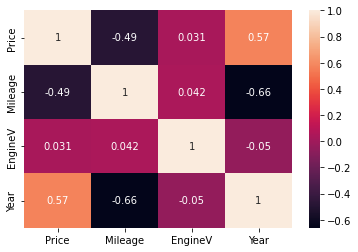

In [14]:
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot= True)
plt.show()

In [15]:
categorical_variables = data.drop(['Mileage', 'EngineV', 'Year', 'Price'], axis= 1)
categorical_variables

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4
...,...,...,...,...,...
4339,Toyota,sedan,Petrol,yes,Corolla
4341,BMW,sedan,Petrol,yes,535
4342,BMW,sedan,Petrol,yes,520
4343,Toyota,sedan,Petrol,yes,Corolla


In [16]:
from scipy.stats import spearmanr
spearmanr_coeff,_ = spearmanr(categorical_variables.Model, categorical_variables.Brand)
spearmanr_coeff

0.34764793152567414

In [17]:
coeff_Model_Body,_ = spearmanr(categorical_variables.Model, categorical_variables.Body)
coeff_Model_Body

-0.08658919938672405

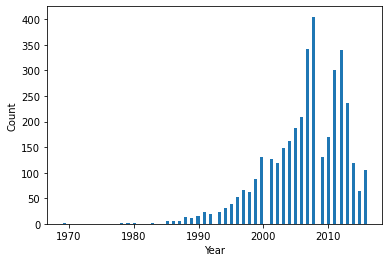

In [18]:
plt.hist(data['Year'], bins= 100)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

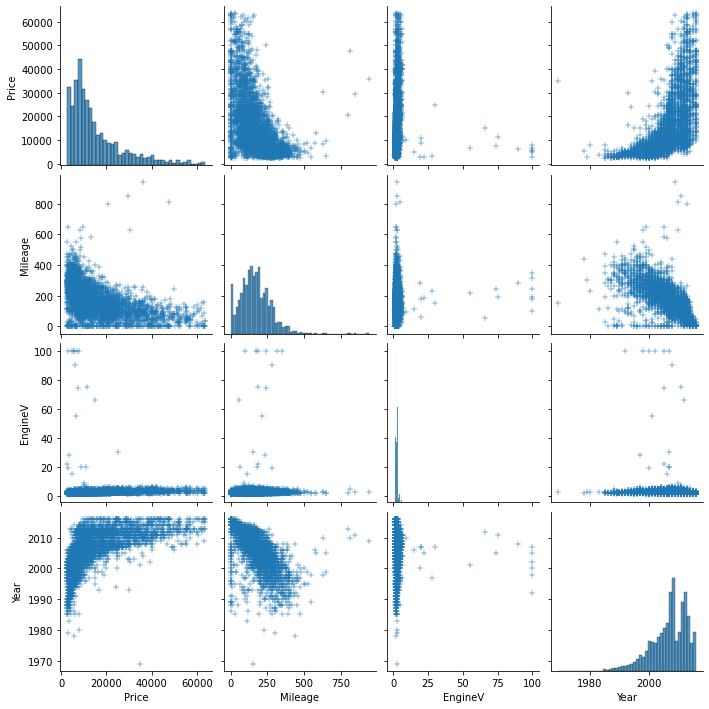

In [19]:
sns.pairplot(data, markers= '+')
plt.show()

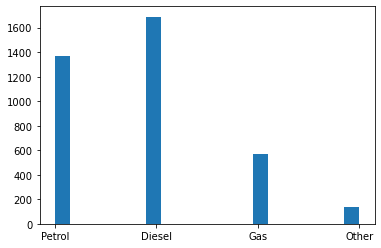

In [20]:
plt.hist(data['Engine Type'], bins= 20)
plt.show()

In [21]:
Mileage_data = data['Mileage'].values
Mileage_data = Mileage_data.reshape(len(Mileage_data))
data = data[data['Mileage'].between(np.percentile(Mileage_data,5), np.percentile(Mileage_data,95), inclusive=True )]

C:\Users\merci\AppData\Local\Temp/ipykernel_9124/2783726530.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  data = data[data['Mileage'].between(np.percentile(Mileage_data,5), np.percentile(Mileage_data,95), inclusive=True )]


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

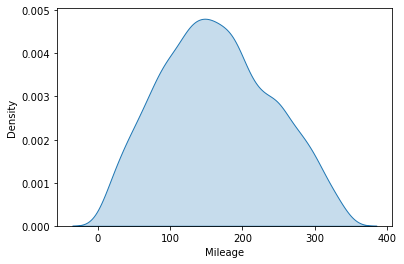

In [22]:
sns.kdeplot(data['Mileage'], shade= True)

In [23]:
EngineV_data = data['EngineV'].values
EngineV_data = EngineV_data.reshape(len(EngineV_data))
data = data[data['EngineV'].between(np.percentile(EngineV_data,5), np.percentile(EngineV_data,95), inclusive=True )]

C:\Users\merci\AppData\Local\Temp/ipykernel_9124/2205236551.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  data = data[data['EngineV'].between(np.percentile(EngineV_data,5), np.percentile(EngineV_data,95), inclusive=True )]


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

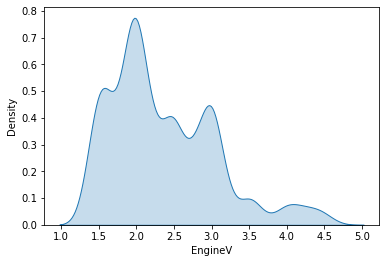

In [24]:
sns.kdeplot(data['EngineV'], shade= True)

In [25]:
Year_data = data['Year'].values
Year_data = Year_data.reshape(len(Year_data))
data = data[data['Year'].between(np.percentile(Year_data,5), np.percentile(Year_data,95), inclusive=True )]

C:\Users\merci\AppData\Local\Temp/ipykernel_9124/238882376.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  data = data[data['Year'].between(np.percentile(Year_data,5), np.percentile(Year_data,95), inclusive=True )]


<AxesSubplot:xlabel='Year', ylabel='Density'>

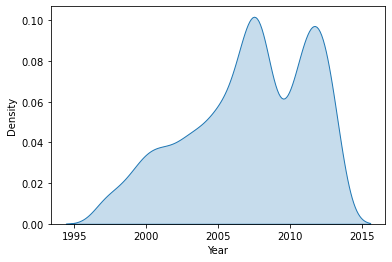

In [26]:
sns.kdeplot(data['Year'], shade= True)

In [27]:
data.rename(columns= {'Engine Type': 'Engine_Type'}, inplace= True)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,Megane


In [28]:
data['Model'].value_counts

<bound method IndexOpsMixin.value_counts of 3                      Q7
4                   Rav 4
7                      A6
8                  Megane
10                 Megane
              ...        
4334                  116
4335                  320
4337               Megane
4338     T5 (Transporter)
4344    T5 (Transporter) 
Name: Model, Length: 2867, dtype: object>

In [29]:
data.drop(['Model'],axis= 1, inplace= True)

In [30]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011


## Feature Engineering

In [31]:
data['Price'] = np.log(data['Price'])

In [32]:
data = pd.get_dummies(data)

In [33]:
data.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes
3,10.043249,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,9.560997,200,2.7,2006,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,9.287209,193,1.5,2012,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
10,9.388487,177,1.5,2011,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [34]:
X = data.drop(['Price'], axis= 1)
Y = data['Price']
X

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes
3,240,4.2,2007,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,2011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
7,200,2.7,2006,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,193,1.5,2012,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
10,177,1.5,2011,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,145,1.6,2010,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4335,38,2.0,2013,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4337,152,1.6,2007,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4338,163,2.5,2008,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1


## Creating Model

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

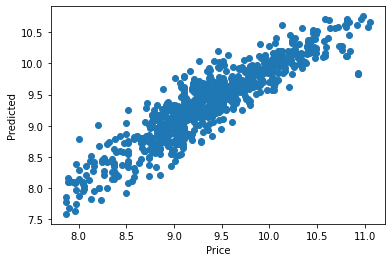

In [38]:
plt.scatter(y_test, y_predict)
plt.xlabel('Price')
plt.ylabel('Predicted')
plt.show()

In [39]:
acc = reg.score(x_test, y_test)
print(acc)

0.8382398198435699


In [40]:
import sklearn.metrics
mse = metrics.mean_squared_error(y_test, y_predict)
mse

0.06513323768833947

### SVM

In [41]:
from sklearn.svm import SVR
svr = SVR(kernel= 'rbf')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [42]:
print(svr.score(x_test, y_test))

0.8762110044324763


In [46]:
mse_svr = metrics.mean_squared_error(y_test, y_pred)
mse_svr

0.04984402257529147

### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
prediction = gb.predict(x_test)

In [44]:
mae = metrics.mean_absolute_error(y_test, prediction)
mae

0.1657957338702473

In [45]:
print(gb.score(x_test, y_test))

0.879659357499995
